In [1]:
from MAMEDataset import MAMEDataset
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

DATASET_PATH = fr'datasets/raw/mame'

In [2]:
train_dataset = MAMEDataset(fr'./datasets/processed/mame/train/labels.csv', 
                            fr'./datasets/processed/mame/train', header=None)
labels_translation = pd.read_csv(os.path.join(DATASET_PATH, 'MAMe_labels.csv'), header=None)
    
num_to_labels_dict = {}
for _, label in labels_translation.iterrows():
    if label[1] == 'Woven fabric':
        label[1] = 'Woven fabric '
    num_to_labels_dict[label[0]] = label[1]

In [3]:
images_idx_to_show = random.sample(range(0, len(train_dataset)), 25)

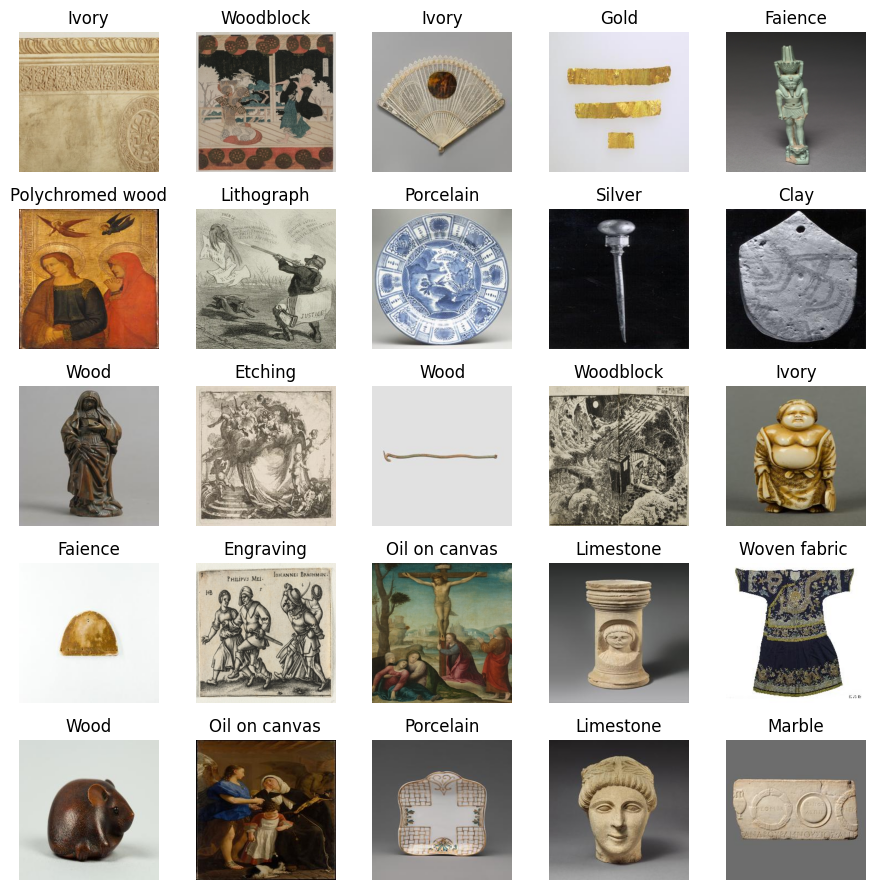

In [4]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(9, 9))

for ax, img_idx in zip(axs.flat, images_idx_to_show):
    image = cv2.cvtColor(train_dataset[img_idx][0], cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    ax.set_title(num_to_labels_dict[train_dataset[img_idx][1][0]])
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [5]:
labels_distribution_temp = train_dataset.get_labels_distribution()
labels_distribution = {}
for label, counts in labels_distribution_temp.items():
    labels_distribution[num_to_labels_dict[label]] = int(labels_distribution_temp[label])


In [6]:
print(f'Number of labels: {len(labels_distribution)}')

Number of labels: 29


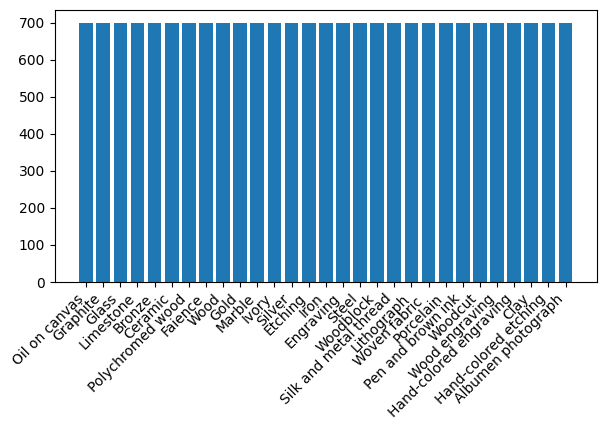

In [7]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(labels_distribution.keys(), labels_distribution.values())
fig.autofmt_xdate(rotation=45)

In [ ]:
# Only execute for Toy Dataset
#print(f'MEAN of dataset: {(np.array(list(train_dataset.get_images()))/255).mean(axis=(0,1,2))}')
#print(f'STD of dataset: {(np.array(list(train_dataset.get_images()))/255).std(axis=(0,1,2))}')

Mean: [0.53116883, 0.57740572, 0.6089572]
STD: [0.26368123, 0.2632309, 0.26533898]